#### Introduction

In the previous lesson, we added a storage variable `favoriteNumber` within our first smart contract and explored different solidity types. In this lesson, you'll discover how to update and retrieve a storage variable, while also learning about functions, visibility, deployment, transactions, gas usage and variable scope.

#### Building the `store` function

To store the `favoriteNumber` variable, we need to implement a new **function**. In Solidity, functions - or mehotds, are portions of code designed to execute specific tasks within the overall codebase. We'll call this new funciton `store`, and it will be responsible for updating the `favoriteNumber` variable.

In [ ]:
contract SimpleStorage {
    uint256 favoriteNumber; // a function will update this variable

    // the function will be written here
}

Functions are identified by the keyword `function`, followed by a custon **name** (e.g. "store") and any additional **parameters** enclosed in rounded parentheses `()`. These parameters represent the values sent to our function. In this case, we inform the `store` function that we want to update `favoriteNumber` with some other value `_favoriteNumber`:

In [ ]:
contract SimpleStorage {
    uint256 favoriteNumber; // storage variable: it's stored in a section of the blockchain called "Storage"

    function store(uint256 _favoriteNumber) public {
        // the variable favorite number is updated with the value that is contained into the parameter '_favoriteNumber'
        favoriteNumber = _favoriteNumber;
    }
}

The content of the function is placed within the curly brackets `{}`. The prefix `_` before `_favoriteNumber` is used to emphasize that the ***local*** variable `_favoriteNumber` is a **different** variable from the ***state*** variable `favoriteNumber`. This helps prevent potential confusion when dealing with different variables with similar names in complex codebases.

#### Deploying the smart contract

You can test out this funciton in the Remix VM environment. At this stage, you can compile your code by navigating to the compile tab and hitting Compile. After compiling, navigate to the tab **Deploy and Run Transactions** to test your function.

The **Deploy and Run Transactions** tab holds a variety of parameters that are used during the deployment process. You'll be assigned an *account* with some ETH to deploy your smart contract.

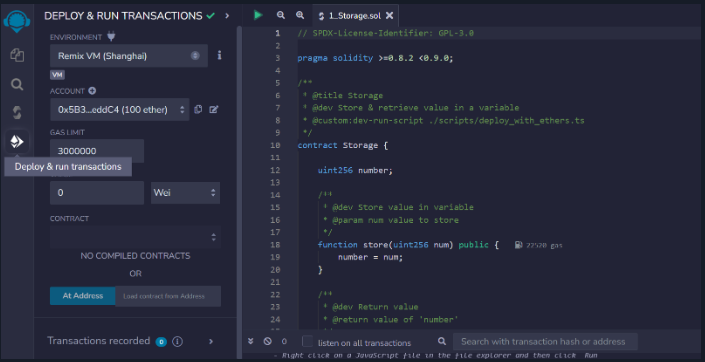

In this environment, your contract is assigned a unique address. You can re-access your deployed contract by expanding the **Deployed Contracts interface and simultaneously opening the terminal, which shows log data of all contract deployments and transactions.

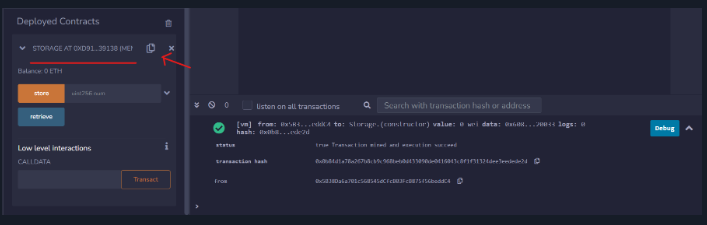

If we open the Remix terminal we can see taht deploying the contract has just sent a simulated transaction on the Remix environment. You can check out its details such as status, hash, from, to and gas.

```
IMPORTANT:
The process of sending a transaction is the SAME for deploying a contract and for sending Ethers. The only difference is that the machine-readable code of the deployed contract is placed inside the *data* field of the deployment transaction.
```

#### Transactions creation

Let's send a transaction to the `store` function to change the value of the variable `favoriteNumber`: you can insert a number and press the `store` button in Remix. A transaction is initiated and after some time, its status will change from pending to complete.

From the accounts section, it becomes visible that ETH is being consumed every time a transaction is submitted. when the state of the blockchain is modified (e.g. deploying a contract, sedning ETH, ...), is done by sending a transaction that consumes **gas**. Executing the `store` function is more expensive than just transferring ETH between accounts, with the rising gas expenses primarily associated (though not exclusively) with the code length.

#### Verifying the stored value

This contract is missing a way to check if the number has been updated: now we can store a value but we cannot be sure if the transaction **actually** changed the variable value.

The default visibility of the `favoriteNumber` variable is **internal**, preventing external contracts and users from viewing it.

```
NOTE:
Appending the `public` keyword next to a variable will automatically change its visibility and it will generate a **gettter function** (a function that gets the variable's value when called).
```

In [ ]:
uint256 public favoriteNumber;

After completing compilation and deployment, a button named `favoriteNumber` will become visible. When pressed, it should return the most recent stored value of the variable `favoriteNumber`.

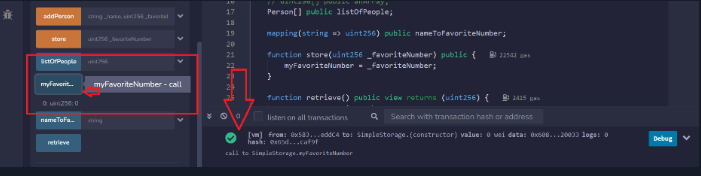

#### Visibility

In Solidity, functions and variables can have one of these four visibility specifiers:

* `public`: accessible from both inside the contract and from external contracts
* `private`: accessible only within the *current contract*. It does not hide a value but only restricts its access.
* `external`: used only for *functions*. Visible only from *outside* the contract.
* `internal`: accessible by the current contract and any contracts *derived* from it.

If a visibility specifier is not given, it defaults to `internal`.

##### Pure and View keywords

The terms `view` and `pure` are used when a function reads values from the blockchain without altering its state. Such functions will not initiate transactions but rather make calls, represented as blue buttons in the Remix interface. A `pure` function will prohibit any reading from the state or storage.

In [ ]:
function retrieve() public view returns(uint256) {
    return favoriteNumber;
}

In [ ]:
function retrieve() public pure returns(uint256) {
    return 7;
}

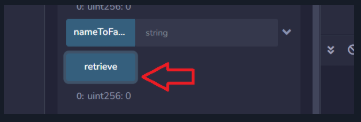

The keyword `returns` specifies the type(s) of value a function will return.

```
WARNING:
While calling `view` or `pure` functions doesn't typically require gas, they do require it when called by another function that modifies the state or storage through a transaction (e.g. calling the function `retrieve` inside the function `storage`). This cost is called **execution cost** and it will add up to the transaction cost.